In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import ParameterGrid, train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
# Define hyperparameters to search
param_grid = {
    'lr': [0.01, 0.001, 0.0001],
    'reg_strength': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128],
    'units': [64, 128, 256]
}

In [4]:
# Initialize lists to store results
hyperparameters = []
accuracies_train = []
accuracies_val = []
losses_train = []

In [5]:
# Grid Search Loop
for params in ParameterGrid(param_grid):
    # Create a neural network model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images
    model.add(Dense(params['units'], activation='relu', kernel_regularizer=l2(params['reg_strength'])))
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the specified learning rate
    optimizer = SGD(learning_rate=params['lr'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=params['batch_size'],
                        validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the training and validation sets
    train_accuracy = max(history.history['accuracy'])
    val_accuracy = max(history.history['val_accuracy'])
    train_loss = min(history.history['loss'])

    # Store hyperparameters and results
    hyperparameters.append(params)
    accuracies_train.append(train_accuracy)
    accuracies_val.append(val_accuracy)
    losses_train.append(train_loss)

    # Print the results
    print("Hyperparameters:", params)
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Training Loss:", train_loss)
    print("-" * 40)

Hyperparameters: {'batch_size': 32, 'lr': 0.01, 'reg_strength': 0.01, 'units': 64}
Training Accuracy: 0.2594583332538605
Validation Accuracy: 0.2933333218097687
Training Loss: 11.291528701782227
----------------------------------------
Hyperparameters: {'batch_size': 32, 'lr': 0.01, 'reg_strength': 0.01, 'units': 128}
Training Accuracy: 0.15552082657814026
Validation Accuracy: 0.1353333294391632
Training Loss: 45.76665115356445
----------------------------------------
Hyperparameters: {'batch_size': 32, 'lr': 0.01, 'reg_strength': 0.01, 'units': 256}
Training Accuracy: 0.3476666808128357
Validation Accuracy: 0.3710833191871643
Training Loss: 24.23560905456543
----------------------------------------
Hyperparameters: {'batch_size': 32, 'lr': 0.01, 'reg_strength': 0.001, 'units': 64}
Training Accuracy: 0.265770822763443
Validation Accuracy: 0.21641667187213898
Training Loss: 3.9731979370117188
----------------------------------------
Hyperparameters: {'batch_size': 32, 'lr': 0.01, 'reg_s

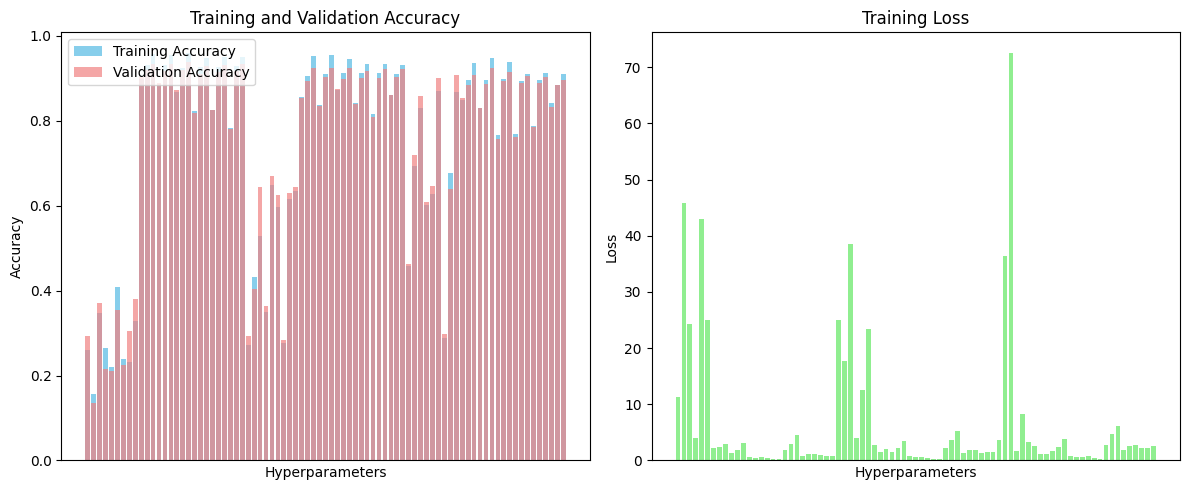

In [6]:
# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x_labels = [str(params) for params in hyperparameters]

ax1.bar(x_labels, accuracies_train, color='skyblue', label='Training Accuracy')
ax1.bar(x_labels, accuracies_val, color='lightcoral', label='Validation Accuracy', alpha=0.7)
ax1.set_xlabel('Hyperparameters')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xticks([])
ax1.legend()

ax2.bar(x_labels, losses_train, color='lightgreen')
ax2.set_xlabel('Hyperparameters')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss')
ax2.set_xticks([])

plt.tight_layout()
plt.show()